<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data09/decision_tree_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [10]:
data = wine[['alcohol','sugar','pH']].to_numpy()

In [11]:
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [9]:
target = wine['class'].to_numpy()
target

array([0., 0., 0., ..., 1., 1., 1.])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [14]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [15]:
train_input

array([[10.5 ,  7.7 ,  3.19],
       [12.4 ,  2.1 ,  3.26],
       [11.8 ,  2.1 ,  3.41],
       ...,
       [ 9.5 ,  5.6 ,  3.24],
       [ 9.5 ,  8.  ,  3.18],
       [ 9.5 ,  2.7 ,  3.51]])

In [16]:
test_input

array([[12.2 , 12.8 ,  3.26],
       [ 9.9 ,  2.2 ,  3.27],
       [12.  ,  7.4 ,  3.18],
       ...,
       [12.4 ,  1.8 ,  3.19],
       [ 9.4 ,  9.7 ,  3.3 ],
       [ 8.7 , 15.5 ,  2.9 ]])

In [17]:
# 스케일링
from sklearn.preprocessing import StandardScaler

In [18]:
# 트레인 데이터로 표준화
ss = StandardScaler()

In [19]:
ss.fit(train_input)

StandardScaler()

In [20]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(train_scaled, train_target)

LogisticRegression()

In [25]:
print(lr.score(train_scaled,train_target))

0.7808350971714451


In [26]:
print(lr.score(test_scaled,test_target))

0.7776923076923077


In [27]:
## 기존의 모델은 설명하기 어려운 모델

In [28]:
## 설명하기 쉬운 모델 => 의사 결정 트리

In [32]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [37]:
# predict_proba의 출력은 각 클래스에 대한 확률
# alcohol, sugar, pH 넣어준것
# ex) 긍정, 부정 두가지의 답을 얻고 싶을때 proba 사용 (각각의 가능성 제시)
lr.predict_proba([[2,2,2]])

array([[0.00804513, 0.99195487]])

In [40]:
lr.predict([[3,3,3]])

array([1.])

In [41]:
# 데이터프레임 값보고 넣어주기
lr.predict_proba([[3,3,3],[10,30,5],[10,15,4]])

array([[1.80925881e-03, 9.98190741e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.89404048e-13, 1.00000000e+00]])

In [42]:
my_wine = [[3,3,3],[10,30,5],[10,15,4]]

In [43]:
lr.predict_proba(my_wine)

array([[1.80925881e-03, 9.98190741e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.89404048e-13, 1.00000000e+00]])

In [44]:
lr.predict(my_wine)

array([1., 1., 1.])

In [45]:
# 각 컬럼의 가중치(weight)와 절편(bias)을 찍어보자
print('weight값 들', lr.coef_)

weight값 들 [[ 0.51270274  1.6733911  -0.68767781]]


In [46]:
# x절편은 직선이 x축과 만나는 점이고, y절편은 직선이 y축과 만나는 점입니다.
print('y절편 ',lr.intercept_)

y절편  [1.81777902]


In [48]:
# 와인의 품질을 이 식으로 분류한다.
# 가중치로 식 판단
# 품질분류 = 0.51 * 알콜 + 1.67 * 당도 - 0.68 * 산도 + 1.81(절편)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
# 파라미터값이 많다
# 오버피팅이 많다
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [52]:
print(dt.score(train_scaled,train_target))

0.996921300750433


In [53]:
print(dt.score(test_scaled,test_target))

0.8592307692307692


In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

[Text(339.05319497019974, 371.8718181818182, 'X[1] <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(164.99331004349227, 354.57545454545453, 'X[1] <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(32.09095119201031, 337.2790909090909, 'X[1] <= -0.854\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(3.711340206185567, 319.98272727272723, 'X[2] <= 3.966\ngini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(2.9690721649484537, 302.6863636363636, 'X[2] <= -2.017\ngini = 0.025\nsamples = 553\nvalue = [7, 546]'),
 Text(1.4845360824742269, 285.39, 'X[2] <= -2.08\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.7422680412371134, 268.09363636363634, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(2.2268041237113403, 268.09363636363634, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.453608247422681, 285.39, 'X[1] <= -0.896\ngini = 0.022\nsamples = 545\nvalue = [6, 539]'),
 Text(3.711340206185567, 268.09363636363634, 'gini = 0.0\ns

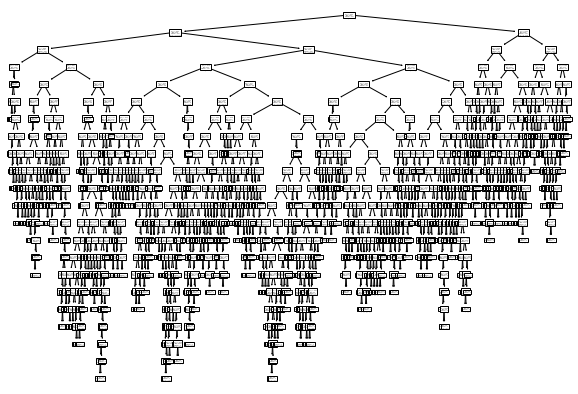

In [55]:
plt.figure(figsize=(10,7))
plot_tree(dt)

[Text(279.0, 317.09999999999997, 'X[1] <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(139.5, 190.26, 'X[1] <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(69.75, 63.420000000000016, '\n  (...)  \n'),
 Text(209.25, 63.420000000000016, '\n  (...)  \n'),
 Text(418.5, 190.26, 'X[1] <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(348.75, 63.420000000000016, '\n  (...)  \n'),
 Text(488.25, 63.420000000000016, '\n  (...)  \n')]

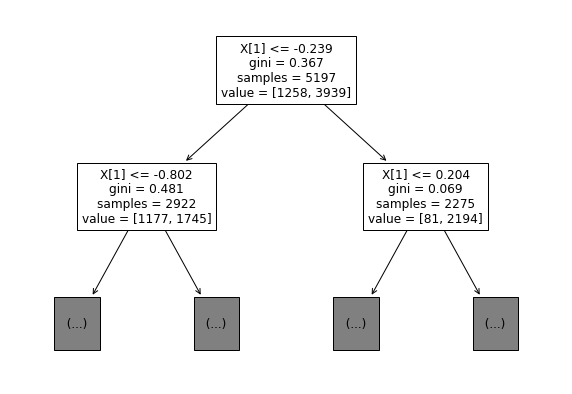

In [56]:
# gini는 혼란스러운 정도를 표현, 낮을수록 좋음
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1)

[Text(279.0, 317.09999999999997, 'sugar <= -0.239\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(139.5, 190.26, 'sugar <= -0.802\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(69.75, 63.420000000000016, '\n  (...)  \n'),
 Text(209.25, 63.420000000000016, '\n  (...)  \n'),
 Text(418.5, 190.26, 'sugar <= 0.204\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(348.75, 63.420000000000016, '\n  (...)  \n'),
 Text(488.25, 63.420000000000016, '\n  (...)  \n')]

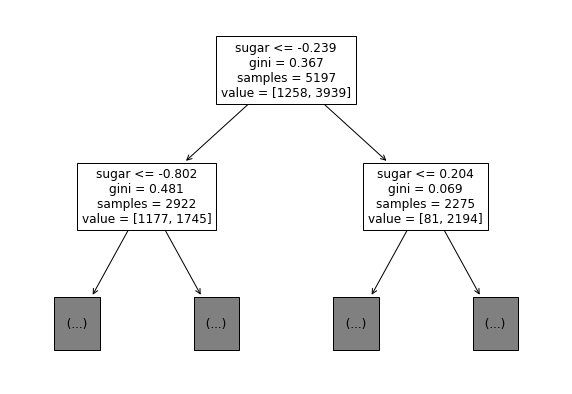

In [57]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1, feature_names=['alcohol','sugar','pH'])

In [58]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


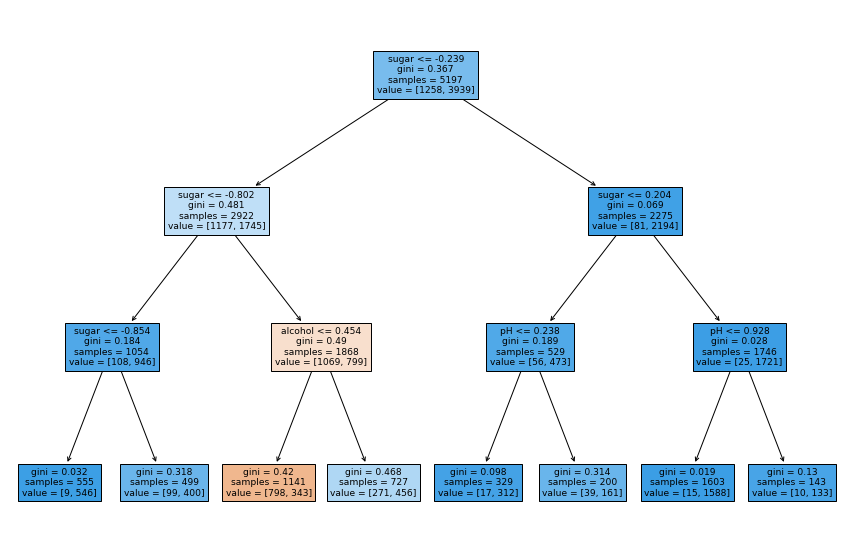

In [61]:
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()